## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [4]:
# import models and fit

In [2]:
import pandas as pd
import numpy as np

# Load training and testing data
X_train = pd.read_csv("X_train (1).csv")
X_test = pd.read_csv("X_test (1).csv")
y_train = pd.read_csv("y_train (1).csv")
y_test = pd.read_csv("y_test (1).csv")


y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print("Data successfully loaded!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data successfully loaded!
X_train shape: (5268, 14)
X_test shape: (1317, 14)
y_train shape: (5268,)
y_test shape: (1317,)


In [3]:
import pandas as pd

y_train = pd.Series(y_train)  # Convert to a Pandas Series
print(y_train.unique())  # Now it should work

[ 527000.  759000. 1560000.  300000.  145000.  157000.  123000.  294988.
   28600.  295000.  519450.  497900.  328350.  292500.  265000.  203000.
  515000.  303000.  375000.  472500.  220000.  419000.  106000.  270000.
  175550.  200000.  335000.  340000.  250000.   42900.  227500.  615000.
  260000.  580000.  362500.  210000.   92500.  240000.  154900.  120000.
  395000.  540000.  325000.  312000.  320000.  259500.   29700.  225000.
  190000.  703125.   79900.  219000.   60000.  599900.  349990.  401000.
  307000. 1925000.  163000.   30000.  263000.  272500.  891000.  275000.
  310000.  236500. 1550000.  255000.  430000.  420000.  519000.  480000.
  350000.  247900.  285000.  510000.  280000.  765000. 1760000.  425000.
  219900.  718800.  378000.  160000.  100000.   90000.  343000.  191000.
   28000.  525000.  103000.  520000.  710000.  448700. 1299000.  315000.
  172500.  232000.  460000.  642500.  858000. 2016000.  675000.  277000.
  282000.  374000.  172000.  248000.  162000.  7500

In [4]:
print(X_train.dtypes)

status          object
list_price     float64
year_built     float64
beds           float64
baths          float64
sqft           float64
lot_sqft       float64
garage         float64
type            object
city           float64
state          float64
postal_code      int64
latitude       float64
longitude      float64
dtype: object


In [5]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ["status", "type"]  # Columns that need encoding

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert to DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns & merge encoded ones
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

print("Final X_train shape:", X_train.shape)


Final X_train shape: (5268, 25)


In [6]:
X_train = X_train.apply(pd.to_numeric, errors="coerce")
X_test = X_test.apply(pd.to_numeric, errors="coerce")

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5  # Root Mean Squared Error
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print(f"Random Forest Results:")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  MAE: {mae_rf:.2f}")
print(f"  R² Score: {r2_rf:.4f}")


Random Forest Results:
  RMSE: 10783.68
  MAE: 2826.25
  R² Score: 0.9986


In [8]:
import xgboost as xgb

# Initialize DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters
params = {
    "objective": "reg:squarederror",  # Use squared error for regression
    "eval_metric": "rmse"
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5  # Root Mean Squared Error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost Results:")
print(f"  RMSE: {rmse_xgb:.2f}")
print(f"  MAE: {mae_xgb:.2f}")
print(f"  R² Score: {r2_xgb:.4f}")


XGBoost Results:
  RMSE: 19850.59
  MAE: 4174.56
  R² Score: 0.9952


In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import the imputer
import numpy as np


# Initialize the imputer with a strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your preferred strategy

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the model
lr_model = LinearRegression()

# Train the model using the imputed data
lr_model.fit(X_train_imputed, y_train)

# Predict on test data (using imputed test data)
y_pred_lr = lr_model.predict(X_test_imputed)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Print results
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R² Score: {r2_lr}")
print(f"Linear Regression MAE: {mae_lr}")



Linear Regression MSE: 8146131580.607352
Linear Regression R² Score: 0.9004959866674442
Linear Regression MAE: 41235.32593670534


In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Import the imputer
import numpy as np

# Initialize the imputer with a strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your preferred strategy

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the SVR model (use RBF kernel for better generalization)
svr_model = SVR(kernel='rbf')

# Train the model using the imputed data
svr_model.fit(X_train_imputed, y_train)  # Use imputed data for training

# Predict on test data (using imputed test data)
y_pred_svr = svr_model.predict(X_test_imputed)  # Use imputed data for prediction

# Evaluate performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f"SVR MSE: {mse_svr}")
print(f"SVR R² Score: {r2_svr}")
print(f"SVR MAE: {mae_svr}")


SVR MSE: 85205835995.02158
SVR R² Score: -0.04077899515441774
SVR MAE: 189419.49125710715


Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [ ]:
# gather evaluation metrics and compare results

In [15]:
from sklearn.metrics import mean_absolute_error

# Calculate additional metrics
rmse_values = [np.sqrt(mse_rf), np.sqrt(mse_xgb), np.sqrt(mse_lr), np.sqrt(mse_svr)]
mae_values = [mean_absolute_error(y_test, y_pred_rf),
              mean_absolute_error(y_test, y_pred_xgb),
              mean_absolute_error(y_test, y_pred_lr),
              mean_absolute_error(y_test, y_pred_svr)]
r2_values = [r2_rf, r2_xgb, r2_lr, r2_svr]

[10783.676120581455, 19850.592718367334, 90255.9226899119, 291900.38711009204]
[2826.2495107299887, 4174.555111641041, 41235.32593670534, 189419.49125710715]
[0.9985795601484435, 0.9951867753225935, 0.9004959866674442, -0.04077899515441774]


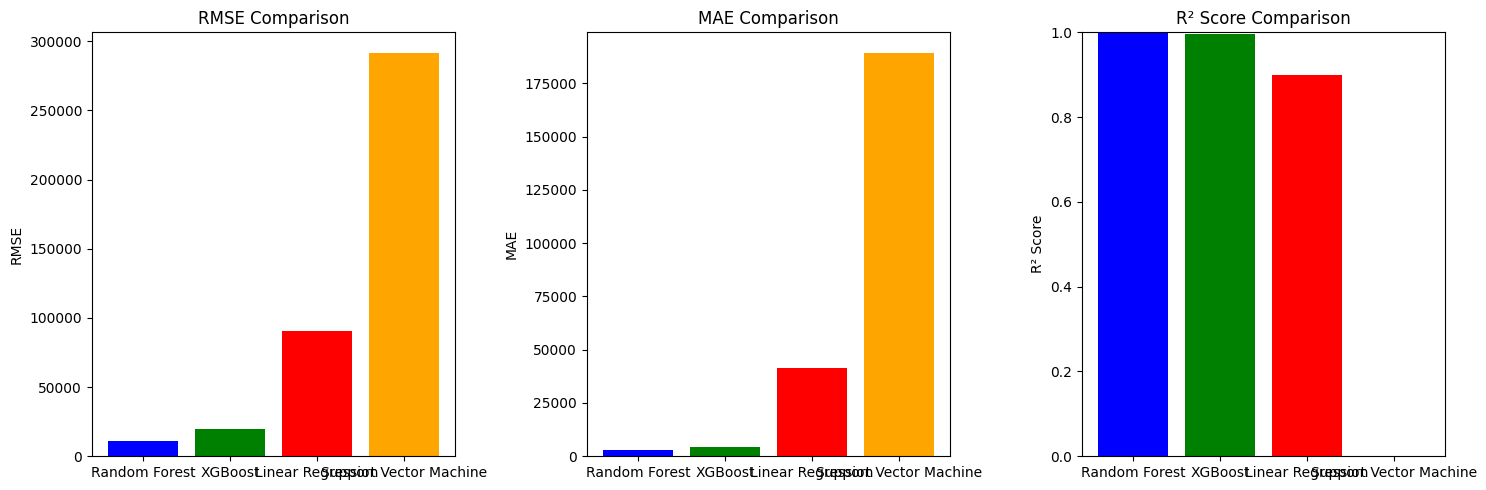

In [18]:
import matplotlib.pyplot as plt

# Define the model names
models = ["Random Forest", "XGBoost", "Linear Regression", "Support Vector Machine"]

# Create subplots for MSE, RMSE, MAE, and R² Score
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RMSE Comparison
axes[0].bar(models, rmse_values, color=['blue', 'green', 'red', 'orange'])
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("RMSE")

# MAE Comparison
axes[1].bar(models, mae_values, color=['blue', 'green', 'red', 'orange'])
axes[1].set_title("MAE Comparison")
axes[1].set_ylabel("MAE")

# R² Score Comparison
axes[2].bar(models, r2_values, color=['blue', 'green', 'red', 'orange'])
axes[2].set_title("R² Score Comparison")
axes[2].set_ylabel("R² Score")
axes[2].set_ylim(0, 1)  # Ensures R² scores are between 0 and 1

plt.tight_layout()
plt.show()

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable.



In [ ]:
# perform feature selection
# refit models
# gather evaluation metrics and compare to the previous step (full feature set)